<a href="https://colab.research.google.com/github/MallaRaraju/DP1_mnist_digit_classification/blob/main/Mnist_Digit_Classification_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dipendencies

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Getting dataset

In [3]:
mnist = tf.keras.datasets.mnist

In [74]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# shape of our training data
x_train.shape

(60000, 28, 28)

In [6]:
# shape of our training labels
y_train.shape
# our labels are categorical

(60000,)

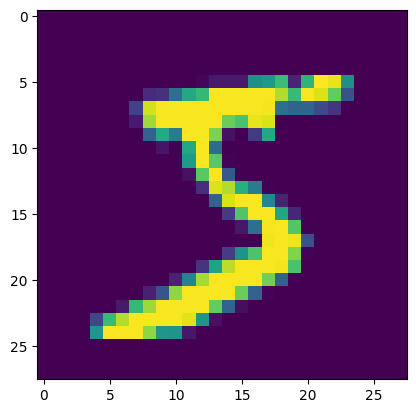

In [7]:
# A sample of our dataset
plt.imshow(x_train[0])
# our dataset consists of 28x28 images of hand-written digits

# Data Pre-processing

In [8]:
# before converted to onehot encoded vector
y_test[0]

7

In [10]:
# converting sparse data to onehot encoded data
y_train = tf.one_hot(y_train, depth = 10)
y_test = tf.one_hot(y_test, depth = 10) #depth represents number of classes
# what we did here is converted data that is labeled in the form of indexes to onehot coded vector
# Example : 7 is changed to [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [27]:
# after converted to onehot encoded vector
y_test[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

we can convert 28x28 image to a vector of size 784, but insted we'll use flattening layer, which will do it while training

# Model building

In [12]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [15]:
model = tf.keras.Sequential()

In [18]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392, activation = 'relu'))
model.add(Dense(196, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(98, activation = 'relu'))
model.add(Dense(10))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dropout (Dropout)           (None, 196)               0         
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 10)                990       
                                                                 
Total params: 405,044
Trainable params: 405,044
Non-trai

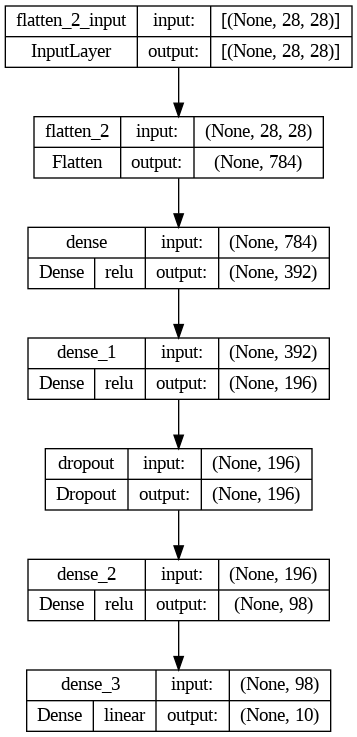

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

# Training our model on the mnist data

In [28]:
model.compile(optimizer ='Adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [31]:
model.fit(x_train, y_train, batch_size=2000, epochs = 20)

Epoch 1/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9682
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9702
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.9715
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0827 - accuracy: 0.9729
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0793 - accuracy: 0.9747
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.9746
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9773
Epoch 8/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9769
Epoch 9/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9788
Epoch 10/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9789
Epoch 11/20
30/30 [

# Evaluate our model

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2105 - accuracy: 0.9625


[0.21045292913913727, 0.9624999761581421]

# Test our model

In [35]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
predictions = tf.nn.softmax(pred)

In [73]:
pred_transpose = tf.transpose(predictions)
y_test = tf.transpose(y_test)

In [70]:
final_pred = tf.argmax(pred_transpose)
y_test = tf.argmax(y_test)

In [75]:
y_test.shape

(10000,)

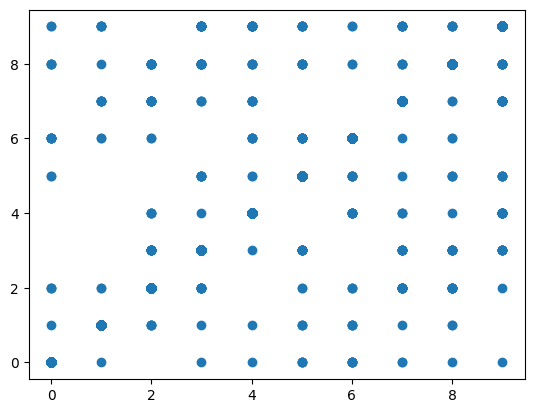

In [76]:
plt.scatter(final_pred,y_test)


#Save our model

In [77]:
model.save('/content')

# Reload our model 

In [82]:
#we can delete our model using del
del model

In [84]:
model = tf.keras.models.load_model("/content")